# Document d'analyse de la presse

Pistes évoquées : 

- Illustration des articles -> iconographie
- Marseille comparé à d'autres villes ?

Discussion du 15/12

- 2 paragraphes pour le RAC qui résume "Vélos en ville dans la presse en 2020" + graphique
- article newsletter pour début janvier : Émilien fait un premier jet puis Ophélie complète avec des détails + conclusion ensemble sur "mais vélo en ville c'est beaucoup que ça"
- recodage des catégories pour avoir une visibilité sur l'année des thèmes
- réfléchir à 2019
- **réunion début janvier pour faire un point sur l'article newsletter**
- regarder les articles au niveau national qui mentionnent vélos + marseille
- Des moments centraux
- Une image assez brutale.
- Aucune mention de la dimension bénévole de l'association

### Chargement des bibliothèques et fonctions

In [13]:
import pandas as pd
import pyshs

## Chargement des données

chargement, mise en forme et renommage

In [4]:
data = pd.read_excel("./Grille de codage - revue de presse écrite 2020-2.xlsx")

#url = "https://github.com/emilienschultz/Documents_temporaires/raw/master/Grille%20de%20codage%20-%20revue%20de%20presse%20e%CC%81crite%202020.xlsx"
#data = pd.read_excel(url)

#data = data.drop(data.columns[0],axis=1)
data.columns = ['Journal', 'Titre', 'Date',
       'Rayonnement', 'Thème',
       'Velo_transport',
       'Velo_central',
       'CVV',
       'Association_general',
       'Dim_mil', 'Dim_env', 'Dim_pol',
       'Dim_asso', 'Marseille_spe',
       'Cadrage',
       'Autres_acteurs',"association_autre_acteurs"]

data["num"] = 1
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index("Date")

#recodage

data

,Journal,Titre,Rayonnement,Thème,Velo_transport,Velo_central,CVV,Association_general,Dim_mil,Dim_env,Dim_pol,Dim_asso,Marseille_spe,Cadrage,Autres_acteurs,association_autre_acteurs,num
Date,,,,,,,,,,,,,,,,,
2020-11-28,20 Minutes,Coup de pouce vélo : les associations poussent...,L,coup de pouce;réparateur;régionales;départemen...,UP,O,Parle pas du CVV (sauf photo atelier),O,N,N,O,N,N,G,N,N,1
2020-11-01,La Marseillaise,Les acteurs économiques du vélo changent de br...,L,réparation;pièce détachée;déconfinement;augmen...,O,O,Stéphane Coppey (administrateur bénévole de le...,Parle pas du CVV,N,N,N,N,UP,G,O,O,1
2020-10-16,20 Minutes,Marseille : la sécurité routière lance une cam...,L,sécurité;accident;trottinette électrique; vélo...,NP,N,Cyril Pimentel (président),O,N,N,N,N,N,G,N,O,1
2020-10-07,Made in Marseille,La ville et la métropole cherchent une vision ...,L,plan vélo métropolitain;PDU;charte vélo;corona...,O,O,Cyril Pimentel (coordinateur),O,N,N,O,N,O,G,N,O,1
2020-10-04,20 Minutes,Coronavirus à Marseille : la mairie pousse la ...,L,corona piste;PDU;cohabitation politique;augmen...,O,O,Cyril Pimentel (président),O,N,N,O,N,O,G,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31,La Provence,"Les déplacements dans la Métropole, un enfer i...",R,PDU;staionnement;piétonnisation;cohabitation d...,O,N,Cyril Pimentel,O,N,N,O,N,O,G,N,O,1
2020-01-22,La Provence,Pollution de l'air : les candidats pris à la g...,R,pollution de l'air;action devant St Charles;mu...,NP,N,Stéphane Coppey (via Printemps marseillais et ...,O,O,O,O,N,UP,EV,O,O,1
2020-01-21,La Marseillaise,Un débat sur la place du vélo,L,projection;débat;municipales,O,O,CVV,O,N,N,O,N,UP,EV,O,N,1


Recodage

In [11]:
dic = pd.read_excel("./recodage_cat_r.xlsx")
dic = dic.set_index("Unnamed: 0")["recodage"].dropna()
def reco(x):
    if x in dic:
        return dic[x]
    return x

## Tris à plat

### Journal

In [14]:
pyshs.tri_a_plat(data["Journal"])

,Effectif,Pourcentage (%)
La Provence,17.0,26.6
Gomet,9.0,14.1
La Marseillaise,8.0,12.5
20 Minutes,6.0,9.4
Marsactu,5.0,7.8
Made in Marseille,4.0,6.2
France 3 Régions,3.0,4.7
France Bleue Bouches du Rhône,2.0,3.1
Le ravi,1.0,1.6
Unidivers,1.0,1.6


### Thèmes

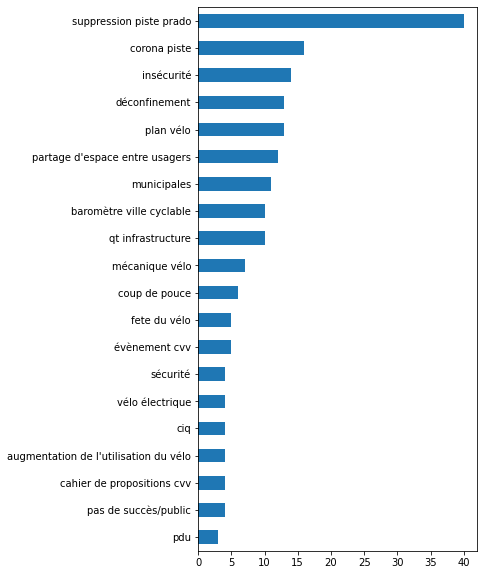

In [37]:
t = [i.lower().split(";") for i in list(data["Thème"]) if pd.notnull(i)]
t = [reco(j.strip()).lower() for i in t for j in i]
pd.Series(t).value_counts()[0:20].sort_values().plot(kind="barh",figsize=(5,10))

Sortie pour le recodage

In [54]:
t = pd.DataFrame(pd.Series(t).value_counts())
t["recodage"] = None
t.to_excel("recodage_cat.xlsx")

In [26]:
pyshs.tri_a_plat(data["Dim_mil"])

,Effectif,Pourcentage (%)
N,37.0,59.7
O,22.0,35.5
UP,3.0,4.8


In [27]:
pyshs.tri_a_plat(data["Dim_asso"])

,Effectif,Pourcentage (%)
N,57.0,91.9
UP,4.0,6.5
O,1.0,1.6


In [28]:
pyshs.tri_a_plat(data["Dim_pol"])

,Effectif,Pourcentage (%)
O,36.0,58.1
N,15.0,24.2
UP,11.0,17.7


In [29]:
pyshs.tri_a_plat(data["Dim_env"])

,Effectif,Pourcentage (%)
N,53.0,85.5
UP,8.0,12.9
O,1.0,1.6


### Centralité du vélo

In [15]:
pyshs.tri_a_plat(data["Velo_central"])

,Effectif,Pourcentage (%)
O,54.0,87.1
N,7.0,11.3
UP,1.0,1.6


In [16]:
pyshs.tri_a_plat(data["Velo_transport"])

,Effectif,Pourcentage (%)
O,30.0,50.0
NP,26.0,43.3
UP,3.0,5.0
O;N,1.0,1.7


In [17]:
pyshs.tri_a_plat(data["Marseille_spe"])

,Effectif,Pourcentage (%)
O,42.0,67.7
N,12.0,19.4
UP,7.0,11.3
O;N,1.0,1.6


In [18]:
pyshs.tri_a_plat(data["Rayonnement"])

,Effectif,Pourcentage (%)
L,31.0,48.4
R,22.0,34.4
D,4.0,6.2
N,3.0,4.7
R (Hors PACA),1.0,1.6
L (Hors PACA),1.0,1.6
M,1.0,1.6
L,1.0,1.6


In [19]:
pyshs.tri_a_plat(data["Cadrage"])

,Effectif,Pourcentage (%)
G,36.0,58.1
EV,18.0,29.0
EV;G,8.0,12.9


In [21]:
pyshs.tri_a_plat(data["Association_general"])

,Effectif,Pourcentage (%)
O,55.0,88.7
O;N,2.0,3.2
Parle pas du CVV,2.0,3.2
Ni O ni N (ne parle pas du CVV),1.0,1.6
Ni O ni N (parle pas du CVV),1.0,1.6
Ni O ni N (CVV juste évoqué via photo),1.0,1.6


Le message du vélo comme mode de transport normal n'est pas si présent que ça.

## Évolution temporelle

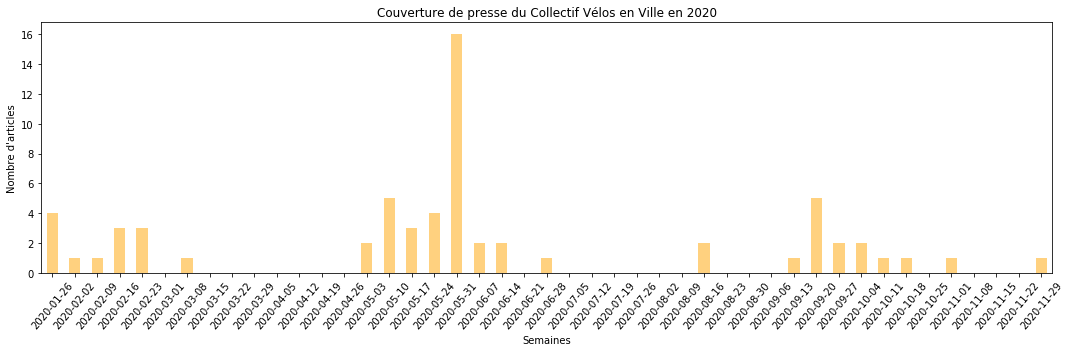

In [101]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
data["num"].resample("w").sum().plot(kind="bar",figsize=(15,5),ax=ax,rot=50,color="orange",alpha=0.5)
locs, labels = plt.xticks()
t = [x.get_text().split()[0] for x in labels]
plt.xticks(locs,t)
plt.title("Couverture de presse du Collectif Vélos en Ville en 2020")
plt.xlabel("Semaines")
plt.ylabel("Nombre d'articles")
plt.tight_layout()
plt.savefig("couverture-presse-cvv-2020.png",dpi=300)